In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import seaborn as sns


In [41]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print("\n".join(description[11:31]))

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [42]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.shape

(569, 31)

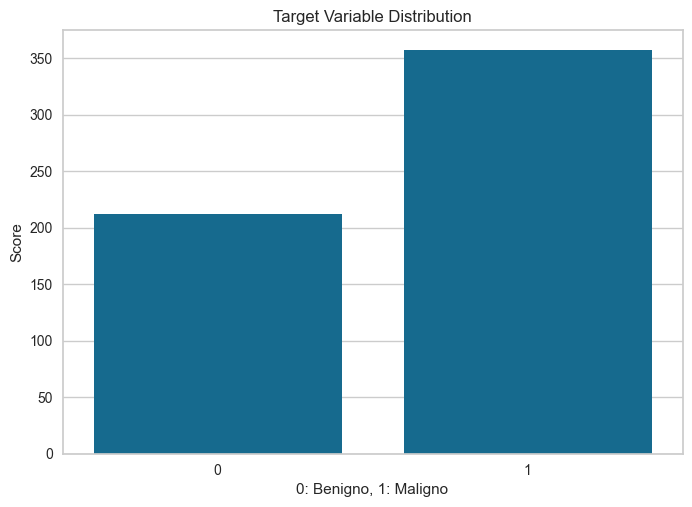

In [43]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('0: Benigno, 1: Maligno')
plt.ylabel('Score')
plt.show()

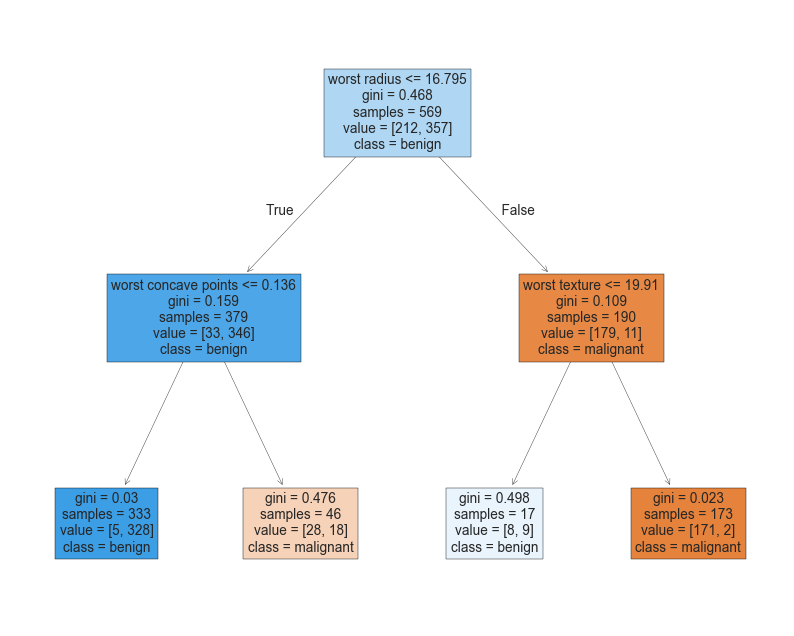

In [44]:
clf = DecisionTreeClassifier(max_depth=2)
X = data.data
y = data.target
clf.fit(X, y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

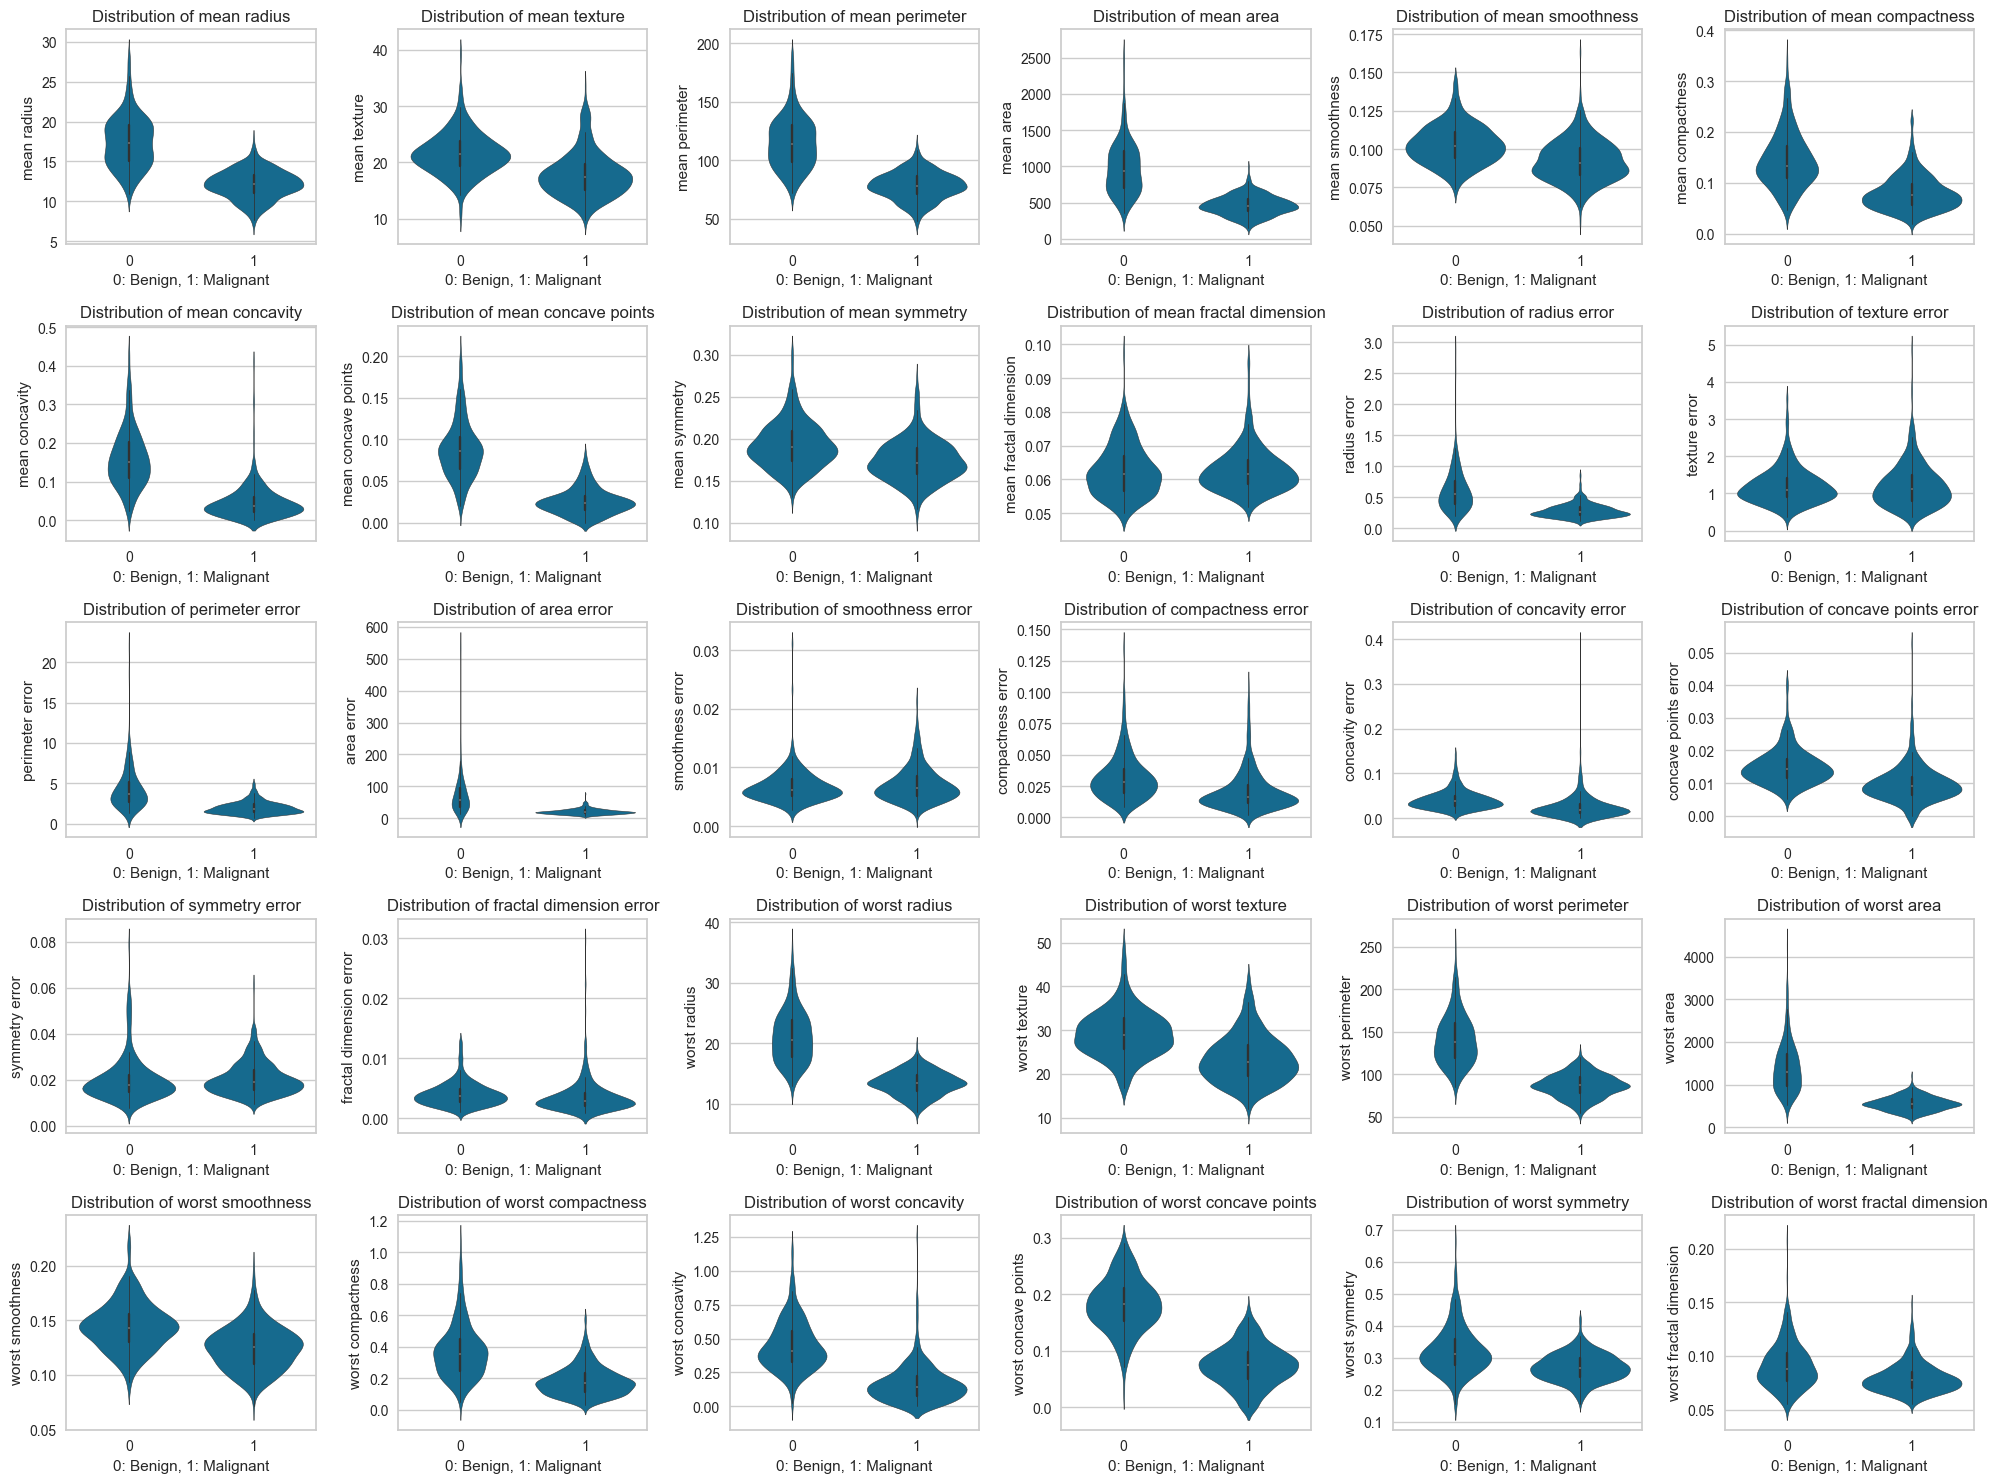

In [45]:
features = df.columns[:-1]
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='target', y=feature, data=df, split=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel('0: Benign, 1: Malignant')
    axs[i].set_ylabel(feature)

for i in range(len(features), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

In [46]:
X = df.drop(columns=['target'])
y = df['target']
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [48]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 2)
svm.fit(X_treinamento, y_treinamento)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
previsoes = svm.predict(X_teste)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.958041958041958

0.958041958041958

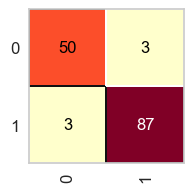

In [51]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

## PCA - Principal Component Analysis

A Análise de Componentes Principais (PCA) é uma técnica utilizada para reduzir o número de variáveis de um conjunto de dados, mantendo o máximo possível da informação essencial. Ela é muito útil quando trabalhamos com bases de dados que possuem muitas colunas e quando percebemos que algumas delas são redundantes ou estão correlacionadas entre si.

O PCA analisa como os dados variam e busca identificar direções de maior variação. Essas direções são chamadas de Componentes Principais.
A ideia é simples, observamos os dados originais, com várias variáveis (por exemplo: altura, peso, idade, renda), o PCA identifica quais variáveis possuem informações parecidas e resume essas informações em uma nova variável. Ele cria então novos eixos (PC1, PC2, PC3...), que representam combinações matemáticas das variáveis originais, mas de forma não redundante. Os primeiros componentes principais são responsáveis pela maior parte da variação dos dados. Por isso, geralmente usamos apenas os primeiros 2 ou 3, mesmo que o conjunto inicial tenha dezenas de variáveis. O resultado é um conjunto de dados mais enxuto, com menos colunas, mas que ainda representa bem o comportamento original.

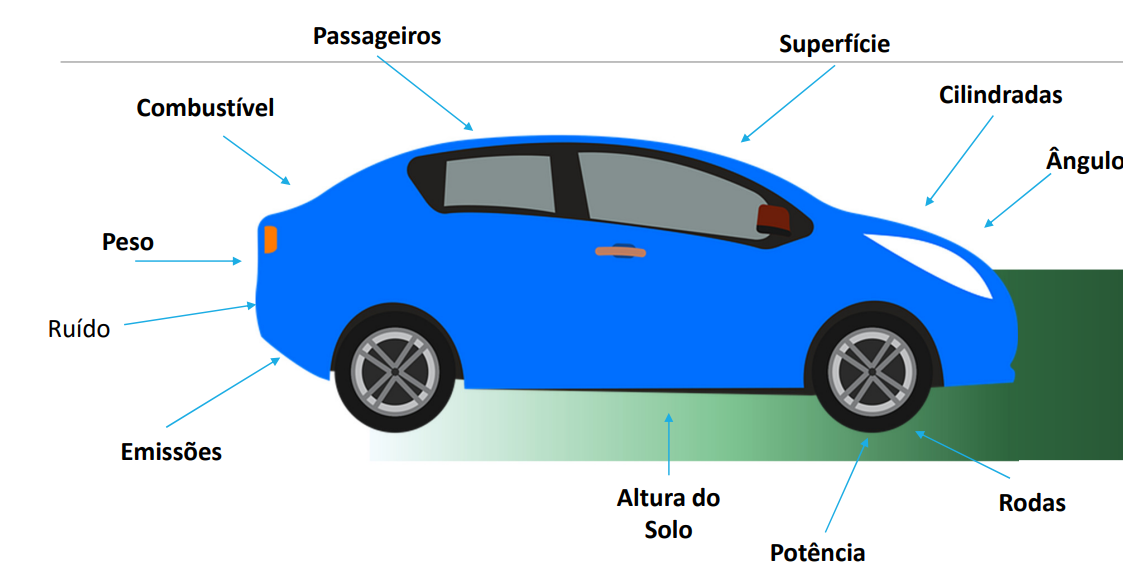

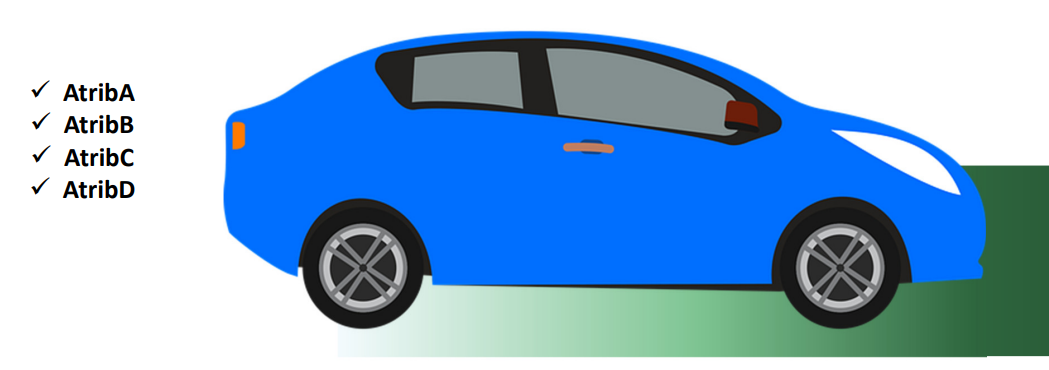

- Alta dimensionalidade: menor capacidade de generalização.
- Redução de Dimensionalidade.
- Cria atributos sintéticos, sem compreensão funcional.
- Estes novos atributos buscam manter as características importantes dos dados.
- Representação dos atributos originais: projeção não permite avaliar importância de atributos e não mais representam o negocio analisado.

Pode ser usado nas seguintes situações:

- Existem muitas variáveis	
- Algumas variáveis parecem conter informação repetida (são correlacionadas)
- Você quer visualizar dados em 2D ou 3D
- Algoritmos de machine learning estão lentos ou com desempenho ruim
- Você quer melhorar a qualidade dos dados antes do treinamento

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_treinamento_pca = pca.fit_transform(X_treinamento)
X_teste_pca = pca.transform(X_teste)
X_treinamento_pca

array([[-2.8380771 , -0.3193802 , -0.50978696,  0.22007787, -0.52742285],
       [-3.23881077,  0.94669515,  1.4630147 ,  0.84543648, -3.50859759],
       [ 3.92831902, -3.3009157 ,  1.84183164,  2.83333596, -0.09483364],
       ...,
       [-3.17962251,  0.43326773,  0.57700503,  0.11186201, -0.75630282],
       [-5.59141525, -0.75288918,  4.06478207,  2.61732114, -0.95172627],
       [-1.20802261,  1.32965049,  1.26115052,  3.49517444,  1.34529382]])

In [53]:
svm_pca = SVC(kernel='linear', C = 2)
svm_pca.fit(X_treinamento_pca, y_treinamento)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [54]:
previsoes = svm_pca.predict(X_teste_pca)
accuracy_score(y_teste, previsoes)

0.965034965034965

## Seleção de Atributos

A inclusão de muitas características do modelo deteriora sua performance, tornando o modelo super ajustado. Dessa forma a seleção de atributoes tem como objetivo definir quais características, entre as "naturais" e as produzidas, são mais importantes para a performance do modelo. 

Para isso existem algumas técnicas:

**Algoritmo de força bruta**

Testa todas as combinações possíveis de atributos para encontrar o subconjunto que gera o melhor desempenho do modelo, escolhe um modelo (por exemplo, uma árvore de decisão), gera todas as combinações possíveis de atributos (ex: se há 10 atributos, há 2¹⁰ = 1024 combinações), treina e avalia o modelo em cada combinação, seleciona o conjunto de atributos que teve o melhor desempenho.

**Teste Qui-Quadrado (Chi²)**

Mede o grau de dependência entre duas variáveis categóricas — por exemplo, um atributo e a classe alvo. Ele verifica se a distribuição observada dos dados difere da distribuição esperada caso as variáveis fossem independentes. Se uma variável (atributo) é independente da classe, não ajuda a prever, deve ser descartada. 

**ANOVA (Analysis of Variance)**

 É um teste estatístico usado para verificar se há diferença significativa entre as médias de dois ou mais grupos. O teste calcula uma estatística F:
 
 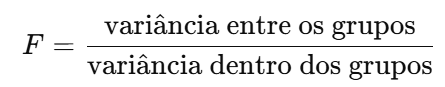

 Se F for alto, significa que as médias dos grupos são bem diferentes, variável importante. Se F for baixo, significa que as médias são parecidas, variável irrelevante. O SelectKBest(f_classif) faz exatamente isso para cada feature numérica, comparando-a com as classes da variável alvo.

In [55]:
from sklearn.feature_selection import f_classif, SelectKBest

selecao = SelectKBest(f_classif, k=7)
X_anova = selecao.fit_transform(X, y)

In [56]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_anova, y, test_size=0.3, random_state=42)


In [57]:
svm_anova = SVC(kernel='linear', C = 2)
svm_anova.fit(X_treino, y_treino)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [58]:
previsoes = svm_anova.predict(X_teste)
accuracy_score(y_teste, previsoes)

0.9766081871345029

## GridSearch

Grid Search (busca em grade) é um método sistemático para testar várias combinações de parâmetros de um modelo de machine learning e descobrir qual configuração gera o melhor desempenho.

Pense nele como um “teste exaustivo” — ele monta uma grade (grid) com todas as combinações possíveis dos valores que você indicar e treina o modelo para cada uma (geralmente usando cross-validation para validar).

In [59]:
from sklearn.model_selection import GridSearchCV
parametros = {'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [60]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf'}
0.9771619313771154


In [61]:
parametros = {'n_estimators': [10, 40, 100, 150,200]}

In [62]:
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_estimators': 10}
0.9666511411271541


In [63]:
parametros = {'n_neighbors': [3, 5, 10, 20]}

In [64]:
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 10}
0.9648657040832168


## Cross-validation

É uma técnica usada para avaliar o desempenho de um modelo de aprendizado de máquina de forma mais confiável evitando que ele pareça melhor (ou pior) do que realmente é. Em vez de treinar e testar o modelo apenas uma vez com uma divisão fixa (por exemplo, 70% treino e 30% teste), o cross-validation repete esse processo várias vezes com diferentes divisões dos dados.

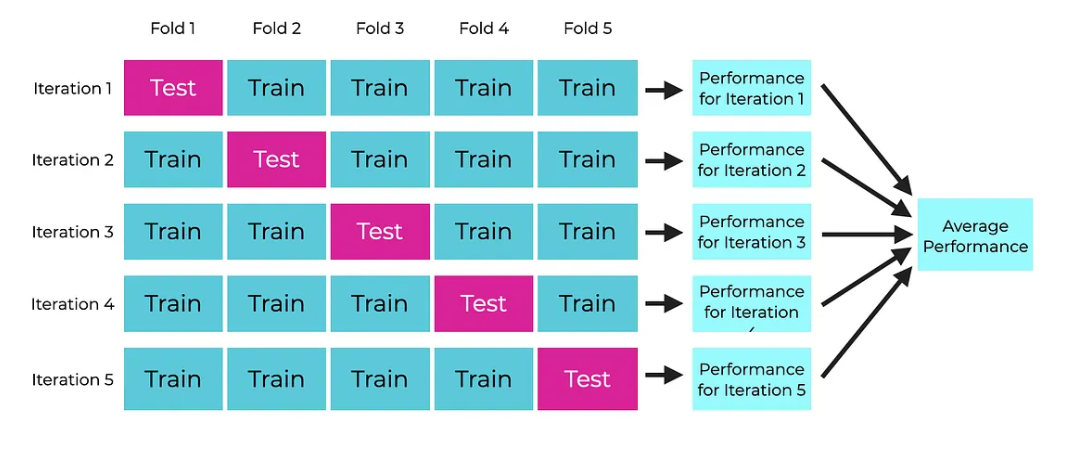

O método mais comum é o K-Fold funciona da seguinte forma: 

- Divide-se o conjunto de dados em K partes (ou “folds”) do mesmo tamanho. Exemplo: se K = 5, teremos 5 subconjuntos.
- O modelo é treinado K vezes, e em cada vez: 1 parte é usada como teste.
- K - 1 partes são usadas como treino.
- Calcula-se a métrica de desempenho em cada uma das K execuções.
- No final, tira-se a média dos resultados, que representa o desempenho real do modelo.

Isso garante que todas as amostras sejam usadas tanto para treino quanto para teste em momentos diferentes.


In [65]:
from sklearn.model_selection import cross_val_score, KFold

In [66]:
resultados_svm = []

for i in range(30):

  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  svm = SVC(kernel = 'rbf', C = 1.5)
  scores = cross_val_score(svm, X, y, cv = kfold)
  resultados_svm.append(scores.mean())

In [67]:
resultados_svm

[np.float64(0.9789473684210526),
 np.float64(0.9736215538847116),
 np.float64(0.9753759398496239),
 np.float64(0.9753759398496239),
 np.float64(0.9771303258145363),
 np.float64(0.9735902255639097),
 np.float64(0.9806704260651629),
 np.float64(0.9718671679197994),
 np.float64(0.9718984962406015),
 np.float64(0.975407268170426),
 np.float64(0.9788533834586465),
 np.float64(0.9788847117794484),
 np.float64(0.9771929824561403),
 np.float64(0.9771616541353383),
 np.float64(0.9807017543859649),
 np.float64(0.9771616541353385),
 np.float64(0.9806704260651629),
 np.float64(0.9753759398496239),
 np.float64(0.9770989974937343),
 np.float64(0.9736842105263157),
 np.float64(0.9753759398496239),
 np.float64(0.9754385964912281),
 np.float64(0.975344611528822),
 np.float64(0.9788533834586465),
 np.float64(0.9789473684210526),
 np.float64(0.9771303258145363),
 np.float64(0.9719298245614034),
 np.float64(0.9789160401002507),
 np.float64(0.975344611528822),
 np.float64(0.9771929824561403)]

In [68]:
print("Acurácia média geral:", np.mean(resultados_svm))
print("Desvio padrão:", np.std(resultados_svm))

Acurácia média geral: 0.9765048036758563
Desvio padrão: 0.002505044650008366


# Exercício 